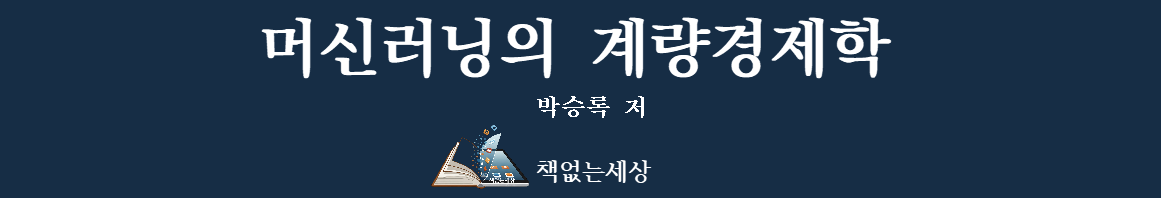

# Part 5: 정성적 선택모형, 제한 종속변수 모형

## Chapter 3: 집계자료 회귀모형

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:/Econometrics_with_ML")
os.getcwd()

'X:\\Econometrics_with_ML'

In [2]:
# exec(open('X:/Econometrics_with_ML/Functions/Traditional_Econometrics_Lib.py').read())

In [3]:

# 전통적 계량경제학에서 자주 사용되는 라이브러리(Libraries for the Analysis of Traditional Econometrics)
# Call this file 
# "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# "%run –i Functions/Traditional_Econometrics_Lib.py"
# "from Functions.Traditional_Econometrics_Lib import * "
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random
from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model
import wooldridge as woo
import wbdata
import warnings
warnings.filterwarnings("ignore")

# Korean Fonts
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

## 3. 포아송 회귀모형, 음이항 회귀모형의 추정

In [4]:
import wooldridge as woo
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson, NegativeBinomial

df = woo.dataWoo('crime1')
df = sm.add_constant(df)

y = df['narr86']
X = df[['const', 'pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'black', 'hispan', 'born60']]

# 포아송 모형(Poisson model)
reg_poisson = Poisson(endog=y, exog=X)
results_poisson = reg_poisson.fit(disp=0)
print(results_poisson.summary())

# 음이항 모형(Negative binomial regression model)
reg_nbinorm = NegativeBinomial(endog=y, exog=X)
results_nbinorm = reg_nbinorm.fit(disp=0)
print(results_nbinorm.summary())


                          Poisson Regression Results                          
Dep. Variable:                 narr86   No. Observations:                 2725
Model:                        Poisson   Df Residuals:                     2715
Method:                           MLE   Df Model:                            9
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                 0.07910
Time:                        18:19:59   Log-Likelihood:                -2248.8
converged:                       True   LL-Null:                       -2441.9
Covariance Type:            nonrobust   LLR p-value:                 1.134e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5996      0.067     -8.916      0.000      -0.731      -0.468
pcnv          -0.4016      0.085     -4.726      0.000      -0.568      -0.235
avgsen        -0.0238      0.020     -1.192      0.2